In [10]:
import numpy
import scipy.special
import scipy.misc
import matplotlib.pyplot
import scipy.ndimage
class NeuralNetwork():
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # 输入层、隐藏层、输出层、学习率
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        # 权重矩阵 正态分布；激活函数sigmod函数
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        self.activation_function = lambda x: scipy.special.expit(x)
        pass

    def train(self, input_list, target_list):
        inputs = numpy.array(input_list, ndmin=2).T
        targets = numpy.array(target_list, ndmin=2).T
        # 计算到隐藏层的信号
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 计算隐藏层输出的信号
        hidden_outputs = self.activation_function(hidden_inputs)
        # 计算到输出层的信号
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        # 隐藏层和输出层权重更新
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (0 - final_outputs)),
                                        numpy.transpose(hidden_outputs))
        # 输入层和隐藏层权重更新
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (0 - hidden_outputs)),
                                        numpy.transpose(inputs))

    def query(self, input_list):
        # 转换输入列表到二维数组
        inputs = numpy.array(input_list, ndmin=2).T
        # 计算到隐藏层的信号
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 计算隐藏层输出的信号
        hidden_outputs = self.activation_function(hidden_inputs)
        # 计算到输出层的信号
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
    

图像中的数字是： 1
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
正确率： 10.0 %


c:\python3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


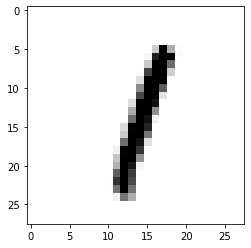

In [11]:
# 设置每层节点个数
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
# 设置学习率为0.3
learning_rate = 0.3
# 创建神经网络
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
# 读取训练数据集 转化为列表
training_data_file = open("mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# 训练神经网络
for record in training_data_list:
    # 根据逗号，将文本数据进行拆分
    all_values = record.split(',')
    # 将文本字符串转化为实数，并创建这些数字的数组。
    inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
    # 创建用零填充的数组，数组的长度为output_nodes,加0.01解决了0输入造成的问题
    targets = numpy.zeros(output_nodes) + 0.01
    # 使用目标标签，将正确元素设置为0.99
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)

# 读取测试文件
test_data_file = open("mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()
# 测试第二组数据
all_values = test_data_list[5].split(',')
# 绘制手写数字的图像
image_array = numpy.asfarray(all_values[1:]).reshape(28,28)
matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='None')
matplotlib.pyplot.show()

print("图像中的数字是：", all_values[0])

# 查询已训练的网络，生成对应每个输出节点所输出的一串数字，输出权重数组
n.query((numpy.asfarray(all_values[1:])/255*0.99)+0.01)

#测试数据集测试
scorecard = []
total = 0
correct = 0
for record in test_data_list:
    total +=1
    all_values = record.split(',') # 将数据以，号进行拆分，保存all_values到中
    # 正确的数字
    correct_label = int(all_values[0])
    # 整理格式化输入列表
    # numpy.asfarray()将文本字符串转化成实数，并创建为数组
    inputs = (numpy.asfarray(all_values[1:])/255*0.99)+0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs) # #获取输出结果
    if(label == correct_label):
        scorecard.append(1)
        correct += 1
    else:
        scorecard.append(0)
print(scorecard)
print('正确率：', (correct/total)*100, '%')

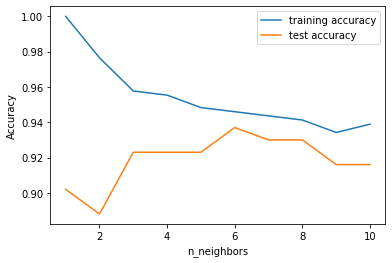

In [12]:
# KNN

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
cancer = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, Y_train)
    training_accuracy.append(clf.score(X_train, Y_train))
    test_accuracy.append(clf.score(X_test, Y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


y_test:	 [0 0 0 1 2 1 0 1 0 1 2 0 2 2 0 1 0 2 2 1 0 0 0 1 0 2 0 1 1 0 0 1 1 0 1 0 2
 1] 
y_predicted:	 [0 0 0 1 1 1 0 1 0 1 1 0 2 2 0 1 0 2 2 1 0 0 0 1 0 2 0 1 1 0 0 1 1 0 1 0 1
 1] 
accuracy:	 92.10526315789474


c:\python3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


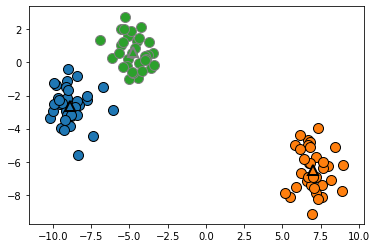

In [13]:
# K-means
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import mglearn
# KMeans test1
dataset = load_iris()
x = dataset.data
y = dataset.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=14)
clf = KMeans(n_clusters=3, random_state=0).fit(x_train)
y_predicted = clf.predict(x_test)
accuracy = np.mean(y_predicted == y_test)*100
print("y_test:\t", y_test, "\ny_predicted:\t", y_predicted, "\naccuracy:\t", accuracy)
# KMeans test2
X, Y = make_blobs(random_state=15)
kmeans = KMeans(n_clusters=3).fit(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0],
                         kmeans.cluster_centers_[:, 1], [0, 1, 2], markers="^", markeredgewidth=2)
plt.show()

In [14]:
# SVM
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

dataset = load_iris()
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, random_state=18)
clf = LinearSVC(random_state=0).fit(x_train, y_train)
y_predicted = clf.predict(x_test)
accuracy = np.mean(y_predicted == y_test)*100
print("y_test:\t", y_test, "\ny_predicted:\t", y_predicted, "\naccuracy:\t", accuracy)

y_test:	 [1 1 1 0 0 0 2 0 2 1 2 1 0 2 0 1 0 2 0 0 1 2 2 1 2 0 0 0 2 2 2 2 1 2 2 0 1
 2] 
y_predicted:	 [1 1 1 0 0 0 1 0 2 1 2 1 0 2 0 1 0 2 0 0 1 2 2 1 2 0 0 0 2 2 2 2 1 2 2 0 1
 2] 
accuracy:	 97.36842105263158


c:\python3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


y_test:	 [20.6 50.  21.5 24.2 16.1 18.7 13.6 13.8 17.1 10.2 22.6] 
y_predicted:	 [16.56262751 39.56255966 20.75975948 25.40220097 21.93665107 21.41086622
 12.34866068  5.8717577  19.28601021 16.90068954 24.41379683]
Regression Coefficients: 
 [-1.08719849e-01  4.50887713e-02  2.81366657e-02  2.72551901e+00
 -1.82523729e+01  3.67455853e+00 -1.34486962e-03 -1.49640106e+00
  3.03575678e-01 -1.21041176e-02 -9.61436172e-01  7.96918368e-03
 -5.42087438e-01]
rmse_train: 5.099373295360574


c:\python3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


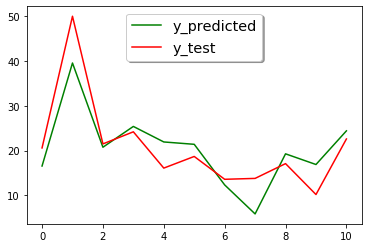

In [15]:
# 线性回归regression
from sklearn import linear_model
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')

dataset = load_boston()
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.02, random_state=14)
lr = linear_model.LinearRegression().fit(x_train, y_train)
y_predicted = lr.predict(x_test)
print("y_test:\t", y_test, "\ny_predicted:\t", y_predicted)
# 输出回归系数
print('Regression Coefficients: \n', lr.coef_)
diff = y_predicted - y_test
err = abs(diff)
total_error = np.dot(err, err)
# 计算标准误差(RMSE)
rmse_train = np.sqrt(total_error/len(y_predicted))
print("rmse_train:", rmse_train)
plt.plot(y_predicted, color='green', label='y_predicted')
plt.plot(y_test, color='red', label='y_test')
plt.legend(loc='upper center', shadow=True, fontsize='x-large')
# 保存图像
plt.show()

y_test:	 [0 0 0 1 2 1 0 1 0 1 2 0 2 2 0 1 0 2 2 1 0 0 0 1 0 2 0 1 1 0 0 1 1 0 1 0 2
 1] 
y_predicted:	 [0 0 0 1 2 1 0 1 0 1 1 0 2 2 0 1 0 2 2 1 0 0 0 1 0 2 0 1 1 0 0 1 1 0 1 0 2
 1] 
accuracy:	 97.36842105263158

Accuracy of training set: 0.9882629107981221
Accuracy of test set: 0.951048951048951


c:\python3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


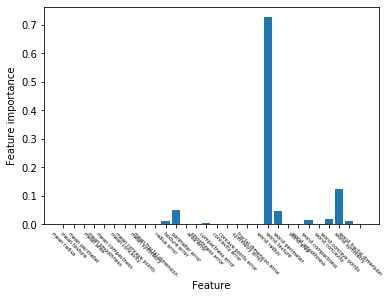

In [16]:
# 决策树decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris,load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
# decision_tree test1
dataset = load_iris()
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, random_state=14)
clf = DecisionTreeClassifier().fit(x_train, y_train)
y_predicted = clf.predict(x_test)
accuracy = np.mean(y_predicted == y_test)*100
print("y_test:\t", y_test, "\ny_predicted:\t", y_predicted, "\naccuracy:\t", accuracy)

# decision_tree test2
cancer = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=42, stratify=cancer.target)
dtreec = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train, Y_train)
print("\nAccuracy of training set: {}\nAccuracy of test set: {}".
      format(dtreec.score(X_train, Y_train), dtreec.score(X_test, Y_test)))
# 绘图并保存图像
n_features = cancer.data.shape[1]
plt.bar(range(n_features), dtreec.feature_importances_)
plt.xticks(np.arange(n_features), cancer.feature_names, rotation=-45, fontsize=5)
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.show()


In [17]:
# 随机森林算法random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

dataset = load_iris()
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, random_state=14)
clf = RandomForestClassifier(max_depth=2, random_state=0).fit(x_train, y_train)
y_predicted = clf.predict(x_test)
accuracy = np.mean(y_predicted == y_test)*100
print("y_test:\t", y_test, "\ny_predicted:\t", y_predicted, "\naccuracy:\t", accuracy)

y_test:	 [0 0 0 1 2 1 0 1 0 1 2 0 2 2 0 1 0 2 2 1 0 0 0 1 0 2 0 1 1 0 0 1 1 0 1 0 2
 1] 
y_predicted:	 [0 0 0 1 2 1 0 1 0 1 1 0 2 2 0 1 0 2 2 1 0 0 0 1 0 2 0 1 1 0 0 1 1 0 1 0 2
 1] 
accuracy:	 97.36842105263158


c:\python3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
# 朴素贝叶斯Naive Bayesian
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

dataset = load_iris()
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, random_state=14)
clf = GaussianNB().fit(x_train, y_train)
y_predicted = clf.predict(x_test)
accuracy = np.mean(y_predicted == y_test)*100
print("y_test:\t", y_test, "\ny_predicted:\t", y_predicted, "\naccuracy:\t", accuracy)

y_test:	 [0 0 0 1 2 1 0 1 0 1 2 0 2 2 0 1 0 2 2 1 0 0 0 1 0 2 0 1 1 0 0 1 1 0 1 0 2
 1] 
y_predicted:	 [0 0 0 1 2 1 0 1 0 1 1 0 2 2 0 1 0 2 2 1 0 0 0 1 0 2 0 1 1 0 0 1 1 0 1 0 2
 1] 
accuracy:	 97.36842105263158


Keys of cancer: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Target_names: ['malignant' 'benign']
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]

Shape of data_new: (569, 2)
[9.19283683 1.94858307]

Accuracy on training set: 0.932
Accuracy on test set: 0.930


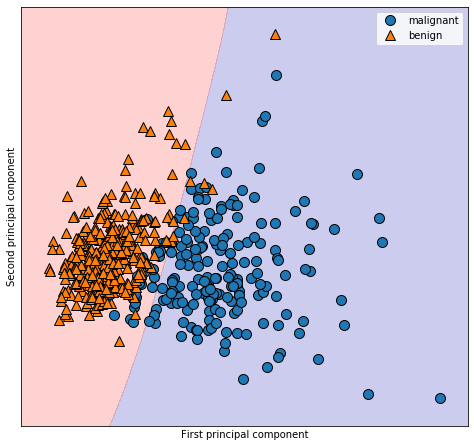

In [19]:
# PCA降维
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

cancer = load_breast_cancer()
print("Keys of cancer: {}".format(cancer.keys()))
print("Target_names: {}".format(cancer.target_names))
print(cancer.data[0])
# 使用StandardScaler对数据集进行特征缩放，之后使用PCA降维
scaler = StandardScaler().fit(cancer.data)
data_scaled = scaler.transform(cancer.data)
pca = PCA(n_components=2).fit(data_scaled)
data_new = pca.transform(data_scaled)

print("\nShape of data_new: {}".format(data_new.shape))
print(data_new[0])
# 上一步将cancer.data转换为data_new，也即完成了主成分分析，所使用的核心函数为PCA()
# 接下来将可视化两个主成分与类别之间的关系，其中包含对降维后的数据进行划分（使用分类器SVC）
X_train, X_test, y_train, y_test = train_test_split(data_new, cancer.target, random_state=2)
svc = SVC(C=.1, gamma=.01).fit(X_train, y_train)
print("\nAccuracy on training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

# 绘制图像，横坐标为主成分1，纵坐标为主成分2，良性与恶性肿瘤用两种不同的背景色区分
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(data_new[:, 0], data_new[:, 1], cancer.target)
mglearn.plots.plot_2d_separator(svc, data_new, fill=True, alpha=0.2)  # 根据分类器，填充背景色
plt.xlabel("First principal component")
plt.ylabel("Second principal conponent")
plt.gca().set_aspect("equal")  # 使x, y轴单位长度相同
plt.legend(cancer.target_names, loc='best')	  # 绘制图像的分类图标
plt.savefig("./outcome.png")  # 保存输出结果

Estimated num of clusters:2


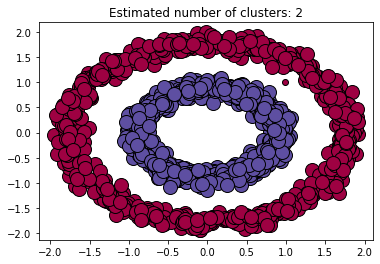

In [20]:
# DBSCAN聚类
from sklearn.cluster import DBSCAN
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# 设置此模式将不会显示绘画窗口
matplotlib.use('Agg')

np.random.seed(0)
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
X, y = noisy_circles
# 标准化数据
X = StandardScaler().fit_transform(X)

# 创建dbscan模型并训练
db = DBSCAN(eps=0.3, min_samples=10).fit(X, sample_weight=None)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
print('Estimated num of clusters:%d' % n_clusters_)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # #Black used for noise
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.savefig('outcome.png')

In [21]:
# Apriori关联规则
from apyori import apriori
transcations = [['beer','nuts'],['beer','cheese'],]
results = list(apriori(transcations))
#输出全部项集
for x in results:
    print(x.items)

frozenset({'beer'})
frozenset({'cheese'})
frozenset({'nuts'})
frozenset({'cheese', 'beer'})
frozenset({'beer', 'nuts'})


In [ ]:
# OCR文字识别 需安装Tesseract
import pytesser3
from PIL import Image

imgdir = "image_ocr.png"
# text1 = pytesser3.image_file_to_string(imgdir)
img = Image.open(imgdir)
text2 = pytesser3.image_to_string(img)
print("结果1：{}\n结果2：{}",(text1, text2))

import pytesseract
from PIL import Image
print(pytesseract.image_to_string(imgdir).decode('gbk2312'))
print(pytesseract.image_to_string(Image.open(imgdir)))
print(pytesseract.image_to_boxes(Image.open(imgdir)))

A face is located at pixel location Top: 15, Left: 97, Bottom: 201, Right: 283


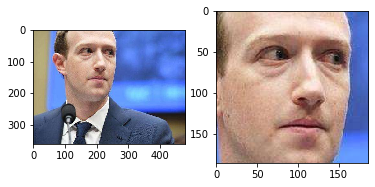

In [37]:
'''人脸定位
## face_recognition_1 ## recoginize one face
install git\cmake
# apt-get -y update
# apt-get install -y git 
# apt-get install zip
# apt-get install -y cmake
'''
import face_recognition
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
# load image,show in left
img = face_recognition.load_image_file('image_face1.jpg')
image = Image.fromarray(img[:,:])
plt.subplot(121)
plt.imshow(image)
# face_locations()
face_locations = face_recognition.face_locations(img)
# print information about face location
top, right, bottom, left = face_locations[0]
print ("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
face_image = img[top:bottom, left:right]
image = Image.fromarray(face_image)
plt.subplot(122)
plt.imshow(image)
plt.savefig('image_face_recognition_result1.jpg')

Find 18|18 faces in the picture.


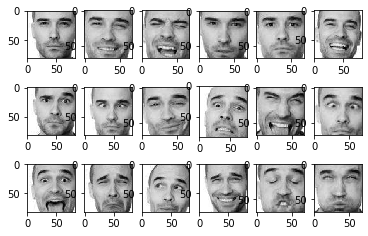

In [34]:
## 人脸定位face_recognition_2 ## recognize more faces
img2 = face_recognition.load_image_file('image_face2.jpg')
# method 1
face_locations1 = face_recognition.face_locations(img2)
# method 2 use the cnn
face_locations2 = face_recognition.face_locations(img2, model='cnn')
print("Find {}|{} faces in the picture.".format(len(face_locations1), len(face_locations2)))
# print information about faces
for i, face_location in enumerate(face_locations2):
    top, right, bottom, left = face_location
    face_image = img2[top:bottom, left:right]
    image = Image.fromarray(face_image)
    plt.subplot(3, 6, i+1)
    plt.imshow(image)
plt.savefig('image_face_recognition_result2.jpg')

In [40]:
# 人脸检测face_detection
import sys
import dlib
import cv2
import os

current_path = os.getcwd()
img_path = current_path + '/image_face1.jpg'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

detector = dlib.get_frontal_face_detector() 
dets = detector(img, 1)
'''
model_path = current_path + 'mmod_human_face_detector.dat'
detector = dlib.cnn_face_detection_model_v1(model_path)
'''
for index, face in enumerate(dets):
    top, right, bottom, left = face.top(), face.right(), face.bottom(), face.left()
    cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 3)
cv2.imwrite('image_face_detection_result1.jpg', img)

True

c:\python3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


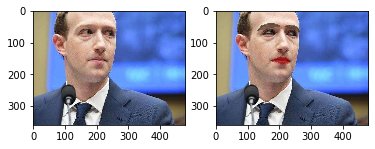

In [48]:
# 数字化妆
import face_recognition
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
# 绘制面部轮廓
img = face_recognition.load_image_file('image_face1.jpg')
image = Image.fromarray(img[:,:])
plt.subplot(121)
plt.imshow(image)
face_landmarks_list = face_recognition.face_landmarks(img) # #8个特征点
'''68个特征点
predictor = dlib.shape_predictor(model_path) #http://dlib.net/files/
shape = predictor(img, face)
'''
for face_landmarks in face_landmarks_list:
    facial_features = ['chin', 'left_eyebrow', 'right_eyebrow', 'nose_bridge', 'nose_tip',
        'left_eye', 'right_eye', 'top_lip', 'bottom_lip']
    image = Image.fromarray(img)
    d = ImageDraw.Draw(image)
    for facial_feature in facial_features:
        d.line(face_landmarks[facial_feature], fill=(255, 255, 255), width=3)
        plt.subplot(122)
        plt.imshow(image)
plt.savefig('image_face_landmark_result1.jpg')

# 数字化妆
for face_landmarks in face_landmarks_list:
    image = Image.fromarray(img)
    d = ImageDraw.Draw(image, 'RGBA')
    # 绘制眉毛
    d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
    d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
    d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
    d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)
    # 绘制嘴唇
    d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
    d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
    d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
    d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)
    # 绘制眼睛
    d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
    d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))
    # 绘制眼线
    d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
    d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)
plt.imshow(image)
plt.savefig('image_face_landmark_result2.jpg')



In [3]:
# 人脸比对  
import sys
import dlib
import cv2
import os
import glob
# 68个特征点输出及128D向量计算
# current_path = os.getcwd()
current_path = r'C:/Users/Lenovo/Desktop/data/'
predictor_path = current_path + 'models/shape_predictor_68_face_landmarks.dat'
face_rec_model_path = current_path + '/models/dlib_face_recognition_resnet_model_v1.dat'  # 测试图片路径
faces_folder_path = current_path + '/faces'
# 读入模型
detector = dlib.get_frontal_face_detector()  # 获取人脸
shape_predictor = dlib.shape_predictor(predictor_path)
face_rec_model = dlib.face_recognition_model_v1(face_rec_model_path)
for index, img_path in enumerate(glob.glob(os.path.join(faces_folder_path,'*.jpg'))):
    #  open cv读取图片
    img_bgr = cv2.imread(img_path, cv2.IMREAD_COLOR) # 读取图片
    b, g, r = cv2.split(img_bgr)  # 分离三个通道
    img_rgb = cv2.merge([r, g, b])  # 融合三个颜色通道生成新图片
    # 人脸标定
    dets = detector(img_bgr, 1)  # 使用detector进行人脸检测，dets为返回结果
    print('--------Start Iterating {} Faces in {}-------'.format(len(dets), img_path.split('/')[-1]))  # 打印识别到的人脸
    # 打印68个特征点
    for idx, face in enumerate(dets):
        # 打印检测到的人脸数
        print('Face{}: left {}; top {}; right {}; bottom {}'.format(idx, face.left(), face.top(), face.right(), face.bottom()))
        # 提取68个特征点
        shape = shape_predictor(img_rgb, face)
        print('--------[1]Print Features0-67 in Face{}-----------'.format(idx))
        for i, cp in enumerate(shape.parts()):
            print('Feature{} : {}'.format(i, cp))
            cp_tuple = (cp.x, cp.y)  # 将xy坐标变为元组类型
            # 在原图画出特征点
            cv2.circle(img_bgr, cp_tuple, 2, (255, 0, 0), 1)
        # 计算人脸的128D的向量
        face_descriptor = face_rec_model.compute_face_descriptor(img_rgb, shape)
        print('-----------[2]Print 128D Vectors in Face{}-----------'.format(idx))
        for i, num in enumerate(face_descriptor):
            print(i, num)
    cv2.imwrite(current_path + 'faces/result'+ str(index)+'.jpg', img_bgr)

--------Start Iterating 1 Faces in faces\image_face3.jpg-------
Face0: left 382; top 125; right 511; bottom 254
--------[1]Print Features0-67 in Face0-----------
Feature0 : (380, 172)
Feature1 : (382, 188)
Feature2 : (384, 204)
Feature3 : (387, 218)
Feature4 : (393, 232)
Feature5 : (402, 242)
Feature6 : (415, 251)
Feature7 : (430, 257)
Feature8 : (446, 259)
Feature9 : (462, 256)
Feature10 : (476, 250)
Feature11 : (489, 241)
Feature12 : (499, 230)
Feature13 : (504, 217)
Feature14 : (507, 201)
Feature15 : (508, 185)
Feature16 : (510, 169)
Feature17 : (395, 155)
Feature18 : (402, 148)
Feature19 : (412, 145)
Feature20 : (423, 145)
Feature21 : (433, 149)
Feature22 : (457, 148)
Feature23 : (467, 144)
Feature24 : (477, 143)
Feature25 : (487, 146)
Feature26 : (494, 153)
Feature27 : (445, 165)
Feature28 : (445, 175)
Feature29 : (445, 186)
Feature30 : (445, 196)
Feature31 : (432, 204)
Feature32 : (438, 205)
Feature33 : (445, 207)
Feature34 : (452, 205)
Feature35 : (459, 203)
Feature36 : (408, 16

-----------[2]Print 128D Vectors in Face0-----------
0 -0.11243706196546555
1 0.04738406091928482
2 0.09100565314292908
3 -0.013202791102230549
4 -0.052688416093587875
5 -0.03993292152881622
6 -0.039614539593458176
7 -0.11339742690324783
8 0.12819816172122955
9 -0.10233227908611298
10 0.27936896681785583
11 -0.04895541071891785
12 -0.15252678096294403
13 -0.14058546721935272
14 0.03907565027475357
15 0.16930463910102844
16 -0.2207784801721573
17 -0.1320495456457138
18 -0.12127935886383057
19 0.00276896171271801
20 0.04958758503198624
21 -0.024088967591524124
22 0.06794131547212601
23 -0.04198850691318512
24 -0.1033298671245575
25 -0.43991202116012573
26 -0.09766238927841187
27 -0.08997619152069092
28 0.05721992254257202
29 -0.036020565778017044
30 -0.023452110588550568
31 0.009877544827759266
32 -0.2687970995903015
33 -0.062778539955616
34 -0.011462031863629818
35 0.051467038691043854
36 -0.024026166647672653
37 -0.03360101953148842
38 0.21231135725975037
39 -0.03137286752462387
40 -0.

In [19]:
# 定义人脸识别类
import numpy as np
class face_compare (object):
    def __init__ (self):
        self.name = None
        self.img_bgr = None
        self.img_rgb = None
        # 获取当前路径
        #self.current_path = os.getcwd ()
        self.current_path = r'C:/Users/Lenovo/Desktop/data/'
        # 模型路径
        self.predictor_path = self.current_path + "models/shape_predictor_68_face_landmarks.dat"
        self.face_rec_model_path = self.current_path + "models/dlib_face_recognition_resnet_model_v1.dat"
        # 测试图片路径
        self.faces_folder_path = self.current_path + "faces/"
        # 128D向量保存路径
        self.vector_path = self.current_path + "vectors/"
        # 加载模型
        # 检测
        self.detector = dlib.get_frontal_face_detector ()
        # 特征点
        self.shape_predictor = dlib.shape_predictor (self.predictor_path)
        # 人脸识别，用于计算128D向量
        self.face_rec_model = dlib.face_recognition_model_v1 (self.face_rec_model_path)

    def inputFaceImg (self, name='person', img_path=None):
        if img_path == None:
            print('No file!\n')
            return
        self.name = name
        self.img_bgr = cv2.imread (self.current_path + img_path)
        # opencv的bgr格式图片转换成rgb格式
        b, g, r = cv2.split (self.img_bgr)
        self.img_rgb = cv2.merge ([ r, g, b ])

    def create128DVector (self):
        dets = self.detector (self.img_rgb, 1)
        print("Number of faces detected: {}".format (len (dets)))
        for index, face in enumerate (dets):
            # 打印检测到的人脸数
            print('Face{}: left {}; top {}; right {}; bottom {}'.format (index, face.left (), face.top (), face.right (), face.bottom ()))
            # 提取68个特征点
            shape = self.shape_predictor (self.img_rgb, face)
            # 计算人脸128D向量
            face_descriptor = self.face_rec_model.compute_face_descriptor (self.img_rgb, shape)
            return face_descriptor

'''人脸比对
classObj:类对象
face_descripor:人脸的128D向量
''' 
# 将人脸的128D向量保存为npy格式文件
def save128DVector (classObj, face_descriptor):
    if classObj.name == None or face_descriptor == None:
        return
    # 遍历128D向量空间保存numpy数组的形式
    vectors = np.array ([ ])
    for idx, vector in enumerate (face_descriptor):
        vectors = np.append (vectors, vector)
    vector_path = classObj.vector_path + classObj.name + '.npy'
    print('Save 128D vectors to :{}'.format (vector_path))
    np.save (vector_path, vectors)
    return vectors
# 加载人脸128D向量npy文件，比对时读取该文件中数据
def load128DVector (classObj, personName):
    if personName == None:
        return
    vector_path = classObj.vector_path + personName + '.npy'
    print ('Load {} 128D vectors'.format(personName))
    vectors = np.load (vector_path)
    return vectors
# 根据欧式距离计算并比对128D向量空间距离，定义判别阈值为0.6，如果距离超过0.6则不是同一个人
def compare128DVector (vector1, vector2):
    distance = 0 
    for i in range(len(vector1)):
        distance += (vector1[i] - vector2[i]) ** 2
    distance = np.sqrt(distance)
    print("欧式距离为：{}".format(distance))
    if distance < 0.6:
        print("同一个人！")
    else:
        print("非同一个人！！！")

# 创建对象
fc = face_compare() 
fc.inputFaceImg(name='LiuPeng',  img_path='/faces/image_face3.jpg')
# 计算128D向量空间，是dlib中vector类对象
vector = fc.create128DVector() 
# 将提取的128D向量数据保存在npy文件
face3_vector = save128DVector(fc, vector)

# 导入第二张图片并提取特征向量
fc.inputFaceImg(name='LuiPeng2', img_path='/faces/image_face4.jpg')
vector = fc.create128DVector() 
face4_vector = save128DVector(fc,vector)

# 导入第三张图片并提取特征向量
fc.inputFaceImg(name='Mayun', img_path='/faces/image_face5.jpg')
vector = fc.create128DVector() 
face5_vector = save128DVector(fc,vector)

# 计算欧式距离判断是否为同一个人
compare128DVector(face3_vector,face4_vector)
compare128DVector(face4_vector,face5_vector)

Number of faces detected: 1
Face0: left 382; top 125; right 511; bottom 254
Save 128D vectors to :C:/Users/Lenovo/Desktop/data/vectors/LiuPeng.npy
Number of faces detected: 1
Face0: left 386; top 160; right 572; bottom 345
Save 128D vectors to :C:/Users/Lenovo/Desktop/data/vectors/LuiPeng2.npy
Number of faces detected: 1
Face0: left 187; top 80; right 294; bottom 187
Save 128D vectors to :C:/Users/Lenovo/Desktop/data/vectors/Mayun.npy
欧式距离为：0.2679140853901554
同一个人！
欧式距离为：0.5333662749100693
同一个人！


In [21]:
# 人脸聚类
import os
import dlib
import glob

current_path = r'C:/Users/Lenovo/Desktop/data/'
# 人脸检测目录目录
predictor_path = current_path + 'models/shape_predictor_5_face_landmarks.dat'
# 人脸识别模型
face_rec_model_path = current_path + 'models/dlib_face_recognition_resnet_model_v1.dat'
# 人脸图片目录
faces_folder_path = current_path + 'faces/'
# 输出目录
output_folder_path = current_path + 'results/'
if not os.path.isdir(output_folder_path):
    os.makedirs(output_folder_path)

detector = dlib.get_frontal_face_detector()
shapepre = dlib.shape_predictor(predictor_path)
facerec  = dlib.face_recognition_model_v1(face_rec_model_path)

descriptors = []
images = []
for f in glob.glob(os.path.join(faces_folder_path, "*.jpg")):
    print("Processing file: {}".format(f))
    img = dlib.load_rgb_image(f)
    # 让探测器发现每个脸部边界， 1表示对图片进行上采样，使得图片更大并允许检测更多面孔
    dets = detector(img, 1)
    print("Num of face detected: {}".format(len(dets)))
    for k, d in enumerate(dets):
        shape = shapepre(img, d)  # 获取特征点
        face_descriptor = facerec.compute_face_descriptor(img, shape)
        descriptors.append(face_descriptor)
        images.append((img, shape))

labels = dlib.chinese_whispers_clustering(descriptors, 0.5)
num_classes = len(set(labels))
print("Num of clusters: {}".format(num_classes))

# 发现最大的类
biggest_class = None
biggest_class_length = 0
for i in range(0, num_classes):
    class_length = len([label for label in labels if label == i])
    if class_length > biggest_class_length:
        biggest_class_length = class_length
        biggest_class = i
print("Biggest cluster id number: {}".format(biggest_class))
print("Number of faces in biggest cluster: {}".format(biggest_class_length))

indices = []
for i, label in enumerate(labels):
    if label == biggest_class:
        indices.append(i)
print("Indices of images in the biggest cluster: {}".format(str(indices)))

print("Saving faces in largest cluster to output folder...")
for i, index in enumerate(indices):
    img, shape = images[index]
    file_path = os.path.join(output_folder_path, "face_" + str(i))
    dlib.save_face_chip(img, shape, file_path, size=150, padding=0.25)

Processing file: C:/Users/Lenovo/Desktop/data/faces\2007_007763.jpg
Num of face detected: 7
Processing file: C:/Users/Lenovo/Desktop/data/faces\2008_001009.jpg
Num of face detected: 2
Processing file: C:/Users/Lenovo/Desktop/data/faces\2008_001322.jpg
Num of face detected: 3
Processing file: C:/Users/Lenovo/Desktop/data/faces\2008_002079.jpg
Num of face detected: 6
Processing file: C:/Users/Lenovo/Desktop/data/faces\2008_002470.jpg
Num of face detected: 6
Processing file: C:/Users/Lenovo/Desktop/data/faces\2008_002506.jpg
Num of face detected: 3
Processing file: C:/Users/Lenovo/Desktop/data/faces\2008_004176.jpg
Num of face detected: 7
Processing file: C:/Users/Lenovo/Desktop/data/faces\2008_007676.jpg
Num of face detected: 7
Processing file: C:/Users/Lenovo/Desktop/data/faces\2009_004587.jpg
Num of face detected: 2
Processing file: C:/Users/Lenovo/Desktop/data/faces\bald_guys.jpg
Num of face detected: 24
Processing file: C:/Users/Lenovo/Desktop/data/faces\dogs.jpg
Num of face detected

In [24]:
# 微信头像戴帽子
import numpy as np
import cv2
import dlib
import os

current_path = r'C:/Users/Lenovo/Desktop/data/'
# 人脸检测目录目录
predictor_path = current_path + 'models/shape_predictor_5_face_landmarks.dat'
# 人脸图片目录
faces_folder_path = current_path + 'faces/'
# 读取模型
detector = dlib.get_frontal_face_detector()  # dlib正脸检测器
predictor = dlib.shape_predictor(predictor_path)

hat_bgr = cv2.imread(current_path + '/faces/hat.png', -1)
face_bgr = cv2.imread(current_path + '/faces/faces1.jpg', -1)

def add_hat(face_bgr, hat_bgr):
    r, g, b, a = cv2.split(hat_bgr)
    hat_rgb = cv2.merge((r,g,b))

    dets = detector(face_bgr, 1)
    for idx, face in enumerate(dets):
        x, y, w, h = face.left(), face.top(), face.right() - face.left(), face.bottom() - face.top()
        # 提取5个特征点
        shape = predictor(face_bgr, face)
        # 选取左右眼眼角的点
        feature1 = shape.part(0)
        feature2 = shape.part(2)
        # 求两点中心,变成元组的形式
        eyes_center = ((feature1.x + feature2.x) // 2, (feature1.y + feature2.y) // 2)
        #  根据人脸大小调整帽子大小
        factor = 1.5
        hat_resizeH = int(round(hat_rgb.shape[0] * w / hat_rgb.shape[1] * factor))
        hat_resizeW = int(round(hat_rgb.shape[1] * w / hat_rgb.shape[1] * factor))
        if hat_resizeH > y:
            hat_resizeH = y - 1
        # 根据人脸大小调整帽子大小
        hat_resized = cv2.resize(hat_rgb, (hat_resizeW, hat_resizeH))
        # 用alpha通道作为mask
        mask = cv2.resize(a, (hat_resizeW, hat_resizeH))
        mask_inv = cv2.bitwise_not(mask)
        # 帽子相对与人脸框上线的偏移量
        dh = 0
        dw = 0
        # 原图ROI
        face_roi = face_bgr[y + dh - hat_resizeH:y + dh, (eyes_center[0] - hat_resizeW // 3):(eyes_center[0] + hat_resizeW // 3 * 2)]
        # 原图ROI中提取放帽子的区域
        face_roi = face_roi.astype(float)
        mask_inv = cv2.merge((mask_inv, mask_inv, mask_inv))
        alpha = mask_inv.astype(float) / 255
        # 相乘之前保证两者大小一致（可能会由于四舍五入原因不一致）
        alpha = cv2.resize(alpha, (face_roi.shape[1], face_roi.shape[0]))
        bg = cv2.multiply(alpha, face_roi)
        bg = bg.astype('uint8')
        # 提取帽子区域
        hat = cv2.bitwise_and(hat_resized, hat_resized, mask=mask)
        # 相加之前保证两者大小一致（可能会由于四舍五入原因不一致）
        hat = cv2.resize(hat, (face_roi.shape[1], face_roi.shape[0]))
        # 两个ROI区域相加
        add_hat = cv2.add(bg, hat)
        # 把添加好帽子的区域放回原图
        face_bgr[y + dh - hat_resizeH:y + dh, (eyes_center[0] - hat_resizeW // 3):(eyes_center[0] + hat_resizeW // 3 * 2)] = add_hat
    return face_bgr

result = add_hat(face_bgr, hat_bgr)
cv2.imwrite(current_path + "/faces/image_add_hat_result.jpg", result)

True

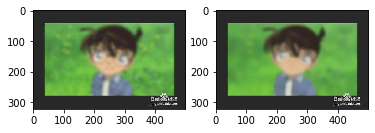

In [2]:
# 图像去噪
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.use('Agg')

# 图片去噪
current_path = r'C:/Users/Lenovo/Desktop/data/'
img_bgr = cv2.imread(current_path + 'image/testImg.jpg', cv2.IMREAD_COLOR)  # 加载图像
img2_bgr = cv2.fastNlMeansDenoisingColored(img_bgr, None, 10, 10, 7, 21)  # 对图像进行去噪

'''
cv2.fastN1MeansDenoising() 使用单个灰度图像
cv2.fastNlMeansDenoisingMulti() 短时间内捕获的图像序列 灰度图像
cv2.fastNlMeansDenoisingColoredMulti()彩色图像
cv2.
'''
b, g, r = cv2.split(img_bgr)
img_rgb = cv2.merge([r, g, b])
b, g, r = cv2.split(img2_bgr)
img2_rgb = cv2.merge([r, g, b])

plt.subplot(121)
plt.imshow(img_rgb)
plt.subplot(122)
plt.imshow(img2_rgb)
plt.savefig('./image/resultImg.jpg')  

# 视频去噪
cap = cv2.VideoCapture('testVideo.avi')  # 参数：视频路径
img = [cap.read()[1] for i in range(5)]  #读取视频前5帧
gray = [cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) for i in img]  # 转化为灰度图
gray = [np.float64(i) for i in gray]  # 转化为float64

noise = np.random.randn(*gray[1].shape)*10
noisy = [i+noise for i in gray]  # 将噪声添加到帧中
noisy = [np.uint8(np.clip(i,0,255)) for i in noisy]  # 转换回uint8
dst = cv2.fastNlMeansDenoisingMulti(noisy, 2, 5, None, 4, 7, 35)  # 将第三帧去噪
plt.subplot(131)
plt.imshow(gray[2],'gray')
plt.subplot(132)
plt.imshow(noisy[2],'gray')
plt.subplot(133)
plt.imshow(dst,'gray')
plt.savefig('resultVideo.jpg')

In [9]:
# 图像修复
import cv2
current_path = r'C:/Users/Lenovo/Desktop/data/'
damageImg = cv2.imread(current_path + 'image/damageImg.png')
# 使用阈值分割得到掩膜图
_, mask2 = cv2.threshold(cv2.cvtColor(damageImg, cv2.COLOR_BGR2GRAY), 10, 255, cv2.THRESH_BINARY_INV)
cv2.imwrite(current_path + 'image/mask.png', mask2)
mask = cv2.imread(current_path + 'image/mask.png', cv2.IMREAD_GRAYSCALE)
'''
cv2.inpaint( src, inpaintMask, dst, inpaintRadius, flags );
参数详解：
src：需要进行修复的图像
inpaintMask：图像的掩码，单通道图像，大小与src图像一致，注意非0像素点表示为需要修复的点；
dst：输出的经过修复的图像；
inpaintRadius：修复算法取的邻域半径，用于计算当前像素点的差值；
flags：修复算法包含两种cv2.INPAINT_TELEA和cv2.INPAINT_NS；'''
dst1 = cv2.inpaint(damageImg, mask, 5, cv2.INPAINT_TELEA)
cv2.imwrite(current_path + 'image/dst1.jpg', dst1)
dst2 = cv2.inpaint(damageImg, mask, 3, cv2.INPAINT_NS)
cv2.imwrite(current_path + 'image/dst2.jpg', dst2)

True